# Part I - Poly-alphabetic Ciphers

## Crypto Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pprint

Define Variables

In [2]:
ENCRYPTED_TEXT = \
    """ FRRPU TIIYE AMIRN QLQVR BOKGK NSNQQ IUTTY
        IIYEA WIJTG LVILA ZWZKT ZCJQH IFNYI WQZXH
        RWZQW OHUTI KWNNQ YDLKA EOTUV XELMT SOSIX
        JSKPR BUXTI TBUXV BLNSX FJKNC HBLUK PDGUI
        IYEAM OJCXW FMJVM MAXYT XFLOL RRLAA JZAXT
        YYWFY NBIVH VYQIO SLPXH ZGYLH WGFSX LPSND
        UKVTR XPKSS VKOWM QKVCR TUUPR WQMWY XTYLQ
        XYYTR TJJGO OLMXV CPPSL KBSEI PMEGC RWZRI
        YDBGE BTMFP ZXVMF MGPVO OKZXX IGGFE SIBRX
        SEWTY OOOKS PKYFC ZIEYF DAXKG ARBIW KFWUA
        SLGLF NMIVH VVPTY IJNSX FJKNC HBLUK PDGUI
        IYEAM HVFDY CULJS EHHMX LRXBN OLVMR """

ENCRYPTED_TEXT_WITHOUT_SPACES = ENCRYPTED_TEXT.replace(" ", "").replace("\n", "")
ENCRYPTED_TEXT_LEN = len(ENCRYPTED_TEXT_WITHOUT_SPACES)

In [3]:
ENCRYPTED_TEXT_WITHOUT_SPACES

'FRRPUTIIYEAMIRNQLQVRBOKGKNSNQQIUTTYIIYEAWIJTGLVILAZWZKTZCJQHIFNYIWQZXHRWZQWOHUTIKWNNQYDLKAEOTUVXELMTSOSIXJSKPRBUXTITBUXVBLNSXFJKNCHBLUKPDGUIIYEAMOJCXWFMJVMMAXYTXFLOLRRLAAJZAXTYYWFYNBIVHVYQIOSLPXHZGYLHWGFSXLPSNDUKVTRXPKSSVKOWMQKVCRTUUPRWQMWYXTYLQXYYTRTJJGOOLMXVCPPSLKBSEIPMEGCRWZRIYDBGEBTMFPZXVMFMGPVOOKZXXIGGFESIBRXSEWTYOOOKSPKYFCZIEYFDAXKGARBIWKFWUASLGLFNMIVHVVPTYIJNSXFJKNCHBLUKPDGUIIYEAMHVFDYCULJSEHHMXLRXBNOLVMR'

In [4]:
# https://norvig.com/mayzner.html
ENGLISH_LETTER_FREQUENCIES = { "E" : 12.49, "T" :  9.28, "A" :  8.04, "O" :  7.64, "I" :  7.57, "N" :  7.23, "S" :  6.51, "R" :  6.28, "H" :  5.05, "L" :  4.07, "D" :  3.82, "C" :  3.34, "U" :  2.73,
                               "M" :  2.51, "F" :  2.40, "P" :  2.14, "G" :  1.87, "W" :  1.68, "Y" :  1.66, "B" :  1.48, "V" :  1.05, "K" :  0.54, "X" :  0.23, "J" :  0.16, "Q" :  0.12, "Z" :  0.09}
sorted_ENGLISH_LETTER_FREQUENCIES = sorted(ENGLISH_LETTER_FREQUENCIES.items(), key=lambda x: x[0])

Given that we are working with Polyalphabetic Ciphers, we will perform a frequency analysis on the ciphertext.
This will help us with a couple of things:
1. We can determine the length of the key
2. To determine the strength of the polyalphabetic cipher which was used to encrypt the message

In [5]:
def frequency_analysis(message):
    frequencies = {}
    for c in message:
        if c in frequencies:
            frequencies[c] += 1
        else:
            frequencies[c] = 1
    return frequencies, sorted(frequencies.items(), key=lambda x: x[0])

In [6]:
def PlotLetterFrequencies(english_letter_frequencies, cipher_letter_frequencies, sorted_english_letter_frequencies, sorted_cipher_letter_frequencies):
    # create 4 subplots, 2 rows and 2 columns
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    # plot english letter frequencies
    axs[0, 0].bar(*zip(*english_letter_frequencies.items()))
    axs[0, 0].bar(*zip(*english_letter_frequencies.items()))
    axs[0, 0].set_title("English Letter Frequencies")
    # plot cipher letter frequencies, sorted by value
    value_sorted_cipher_letter_frequencies = sorted(cipher_letter_frequencies.items(), key=lambda x: x[1], reverse=True)
    axs[0, 1].bar(*zip(*value_sorted_cipher_letter_frequencies))
    axs[0, 1].set_title("Cipher Letter Frequencies")
    # plot sorted english letter frequencies
    axs[1, 0].bar(*zip(*sorted_english_letter_frequencies))
    axs[1, 0].set_title("Sorted English Letter Frequencies")
    # plot sorted cipher letter frequencies
    axs[1, 1].bar(*zip(*sorted_cipher_letter_frequencies))
    axs[1, 1].set_title("Sorted Cipher Letter Frequencies")
    # show the plot
    plt.show()

In [7]:
CIPHER_LETTER_FREQUENCIES, sorted_CIPHER_LETTER_FREQUENCIES = frequency_analysis(ENCRYPTED_TEXT_WITHOUT_SPACES)
print(sorted_CIPHER_LETTER_FREQUENCIES)

[('A', 13), ('B', 13), ('C', 9), ('D', 7), ('E', 13), ('F', 16), ('G', 14), ('H', 12), ('I', 27), ('J', 12), ('K', 20), ('L', 22), ('M', 17), ('N', 14), ('O', 16), ('P', 15), ('Q', 12), ('R', 18), ('S', 18), ('T', 20), ('U', 15), ('V', 18), ('W', 16), ('X', 24), ('Y', 23), ('Z', 11)]


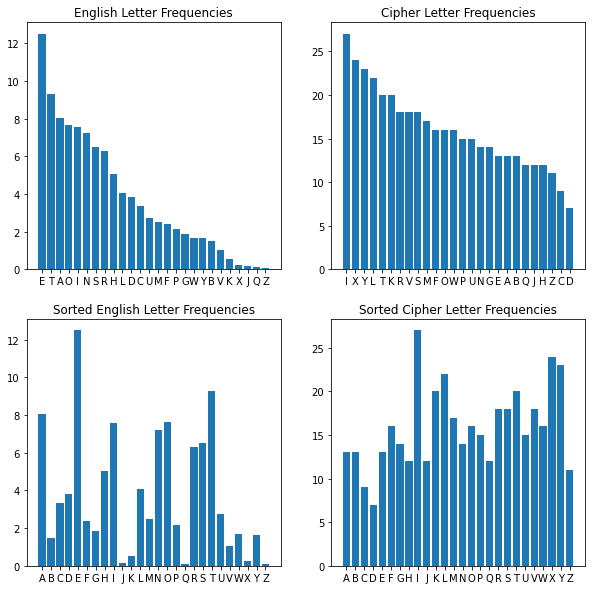

In [8]:
PlotLetterFrequencies(ENGLISH_LETTER_FREQUENCIES, CIPHER_LETTER_FREQUENCIES, sorted_ENGLISH_LETTER_FREQUENCIES, sorted_CIPHER_LETTER_FREQUENCIES)

<img src="./images/PolyAlphabeticCipherDistribution.jpg">

Looking at the the distribution of the characters in the cipher text, we see that the distrubtion is much more uniform than the distribution of the characters in the english language.
An assumtion can be made that the cipher used, considering the polyalphabetic ciphers that have been presented in the lecture, and the typical nature of the Cipher distribution in (1), that the ciphers used might be Vigeneres cipher. 
#TODO show reference to the book.

---

In [9]:
def GetNumberOfCoincidence(cipher, shift=1):
    coincidences = 0
    for i in range(0, len(cipher) - shift):
        if cipher[i] == cipher[i + shift]:
            coincidences += 1
    return coincidences

def GetCoincidencesAndPlot(cipher, max_shift=10):
    coincidences = []
    for i in range(1, max_shift):
        coincidences.append(GetNumberOfCoincidence(cipher, i))
    plt.bar(range(1, max_shift), coincidences)
    plt.title("Coincidences")

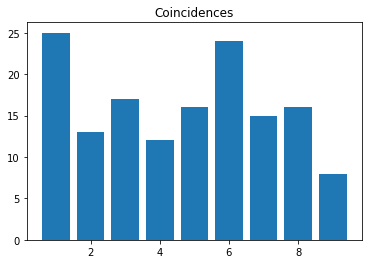

In [10]:
GetCoincidencesAndPlot(ENCRYPTED_TEXT_WITHOUT_SPACES, 10)

In [11]:
def SplitCipherIntoBins(cipher, number_of_bins):
    bins = []
    for i in range(0, number_of_bins):
        bins.append([])
    for i in range(0, len(cipher)):
        bins[i % number_of_bins].append(cipher[i]) # append to bin based on position x % number_of_bins
    return bins

def FrequencyAnalysisOnBins(bins):
    frequencies = []
    for i in range(0, len(bins)):
        frequencies.append(frequency_analysis(bins[i]))
    return frequencies

def PlotLetterFrequenciesOnBin(frequencies, bin_number):
    plt.bar(*zip(*sorted(frequencies[bin_number][0].items(), key=lambda x: x[0])))
    plt.title("Letter Frequencies on Bin " + str(bin_number))

def CollectBinsForAllPossibleBinSizes(cipher, min=1, max=20):
    bins = []
    for i in range(min, max):
        bins.append(SplitCipherIntoBins(cipher, i))
    return bins

In [12]:
bin_collection = CollectBinsForAllPossibleBinSizes(ENCRYPTED_TEXT_WITHOUT_SPACES, 3, 10)

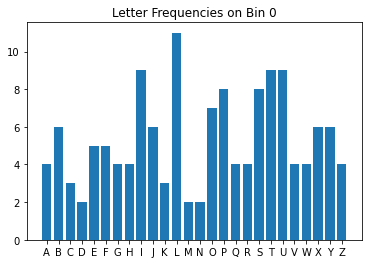

In [13]:
tri_bin_frequencies = FrequencyAnalysisOnBins(bin_collection[0])
PlotLetterFrequenciesOnBin(tri_bin_frequencies, 0)

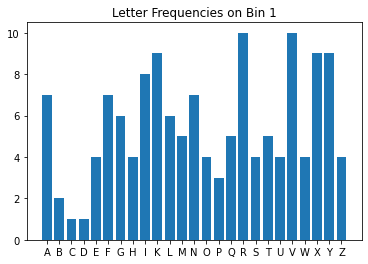

In [14]:
PlotLetterFrequenciesOnBin(tri_bin_frequencies, 1)

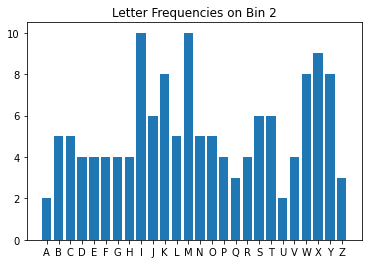

In [15]:
PlotLetterFrequenciesOnBin(tri_bin_frequencies, 2)

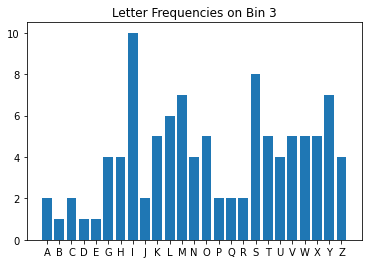

In [16]:
six_bin_frequencies = FrequencyAnalysisOnBins(bin_collection[1])
PlotLetterFrequenciesOnBin(six_bin_frequencies, 3)

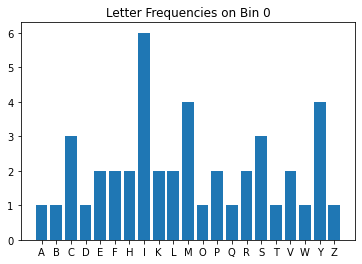

In [17]:
vign_text = "SPGCIQVKLMBWMVOEPALMUYYLAEQVCMFHZMBGSZYSBPOVQHRLWXIQPWBMBELKMEICFMYRTICXKFJIBRIPAIIKRIQTEBPOQYAMKAKRBTCUWDLCYMAIXYPZIIBKFGNLWAZMRHP" #key is key
bin_collection_vign = CollectBinsForAllPossibleBinSizes(vign_text, 3, 6)
bin_collection_vign_frequencies = FrequencyAnalysisOnBins(bin_collection_vign[0])
PlotLetterFrequenciesOnBin(bin_collection_vign_frequencies, 0)

Looking at these bins it looks like there was no repeating key used in the process of encrypting the message.
This suggests that the use of a autokey cipher may have been used.

- autokey cipher or the running key cipher. 
https://www.youtube.com/watch?v=QgHnr8-h0xI&ab_channel=ProofofConcept
https://crypto.katestange.net/cryptanalysis-tools/

---

Next we need to find the key used to cipher the message.

In [18]:
# https://stackoverflow.com/questions/42983803/how-to-code-auto-key-cipher-in-python
ALPHA = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
def autokey_cipher (messages, key, mode='encrypt'):
    cipher = []
    k_index = 0
    key = key.upper()
    for i in messages:
        text = ALPHA.find(i.upper())
        if mode == 'encrypt':
             text += ALPHA.find(key[k_index])
             key += i.upper()  # add current char to keystream

        elif mode == 'decrypt':
             text -= ALPHA.find(key[k_index])
             key += ALPHA[text]  # add current char to keystream

        text %= len(ALPHA)
        k_index += 1
        cipher.append(ALPHA[text])
    return ''.join(cipher)

In [19]:
test_msg, test_key = "THISISATESTMESSAGE", "KEY"
test_enc_autokey = autokey_cipher(test_msg, test_key)
test_dec_autokey = autokey_cipher(test_enc_autokey, test_key, 'decrypt')
print(test_enc_autokey)
print(test_dec_autokey)

DLGLPASBWSMQWLEEYW
THISISATESTMESSAGE


In [ ]:
autokey_cipher(ENCRYPTED_TEXT_WITHOUT_SPACES, "")